<a href="https://colab.research.google.com/github/Arjitm26/Real-or-Fake-NLP-with-X-Tweets/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Table of Contents**

**Loading Data**<br>
 &emsp; Kaggle<br>
**Exploratory Data Analysis**<br>
  &emsp; Analyzing Labels<br>
  &emsp; Analyzing Features<br>

**Data Cleaning**<br>
  &emsp; Remove URL<br>
  &emsp; Handle Tags<br>
  &emsp; Handle Emoji<br>
  &emsp; Remove HTML Tags<br>
  &emsp; Remove Stopwords and Stemming<br>
  &emsp; Remove Useless Characters<br>
  &emsp; WORLDCLOUD<br>

**Final Pre-Processing Data**<br>
  &emsp; Vectorization<br>
  &emsp; Padding<br>

**Machine Learning**<br>
  &emsp; Logistic Regression<br>
  &emsp; Navie Bayes<br>
  &emsp; Support Vector Machine (SVM)<br>
  &emsp; RBF kernel SVM<br>
  &emsp; Linear Kernel SVM<br>
  &emsp; Random Forest<br>

**Deep Learning**<br>
  &emsp; Single Layer Perceptron<br>
  &emsp; Multi Layer Perceptron<br>

**Results**<br>
  &emsp; Accuracy : 84.29%<br>

**Conclusion**<br>
  &emsp; Classified tweets with MLP<br>
  

## Libraries

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
!pip install demoji

In [ ]:
import numpy as np
import pandas as pd

import os

import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import demoji
from wordcloud import WordCloud

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB, MultinomialNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout
from tensorflow.python.keras.initializers import RandomNormal

## Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv("/content/gdrive/My Drive//Colab Notebooks/tweets.csv")

print("Total DataSet: ", len(data))
print("Columns: ", list(data.columns))

X = data[["id", "keyword", "location", "text"]]
y = data[["id","target"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Data", len(y_train))
print("Testing Data", len(y_test))

data.head(3)

Total DataSet:  11370
Columns:  ['id', 'keyword', 'location', 'text', 'target']
Training Data 9096
Testing Data 2274


,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1


## Exploratory Data Analysis

### Analyzing Lables

In [ ]:
Real_len = data[data['target'] == 1].shape[0]
Not_len = data[data['target'] == 0].shape[0]

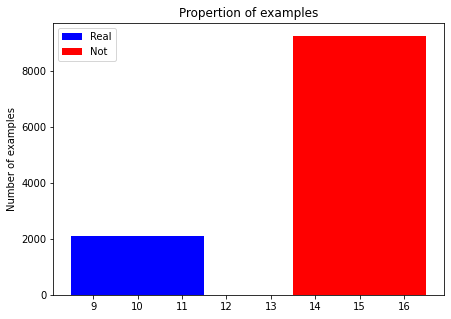

In [ ]:

plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,Real_len,3, label="Real", color='blue')
plt.bar(15,Not_len,3, label="Not", color='red')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propertion of examples')
plt.show()

### Analyzing Features

#### Sentence length analysis

In [ ]:
def length(string):
    return len(string)
data['length'] = data['text'].apply(length)

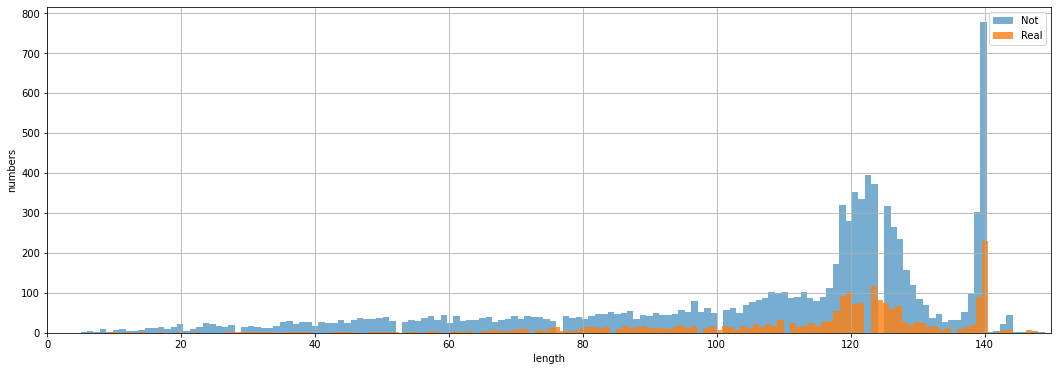

In [ ]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(data[data['target'] == 0]['length'], alpha = 0.6, bins=bins, label='Not')
plt.hist(data[data['target'] == 1]['length'], alpha = 0.8, bins=bins, label='Real')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show()

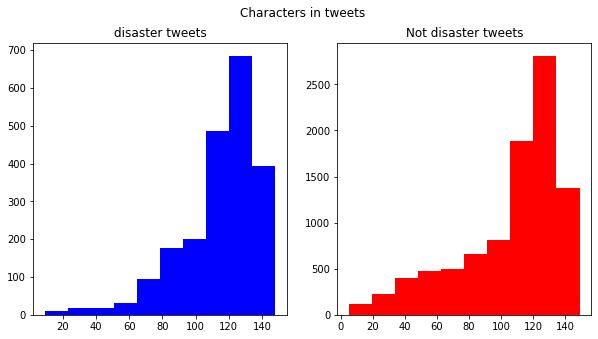

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=data[data['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='blue')
ax1.set_title('disaster tweets')
tweet_len=data[data['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='red')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

## Data Cleaning

Step 1. Remove Url<br>
Step 2. Handle Tags<br>
Step 3. Handle emoji's<br>
Step 4. Remove HTML Tags<br>
Step 5. Remove stopwords<br>
Step 6. Removing Useless Characters

### Step 1. Remove Url

In [ ]:
#https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python/11332580
def Remove_Url(string):
    return re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%|\-)*\b', '', string)

In [ ]:
print("Example of text with URL: \n", X_train['text'][3912], end = "\n\n")
X_train['text'] = X_train['text'].apply(Remove_Url)
print("Example of text without URL: \n", X_train['text'][3912])

Example of text with URL: 
 why the hell would want to join the Kenyan Cabinet? why would… https://t.co/l91GiZ6Wjr

Example of text without URL: 
 why the hell would want to join the Kenyan Cabinet? why would… 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Step 2. Handle Tags

In [ ]:
def Handle_Tags(string):
    pattern = re.compile(r'[@|#][^\s]+')
    matches = pattern.findall(string)
    tags = [match[1:] for match in matches]
    string = re.sub(pattern, '', string)
    return string + ' ' + ' '.join(tags) + ' '+ ' '.join(tags) + ' ' + ' '.join(tags)

In [ ]:
print("Example of text without Handling Tags: \n", X_train['text'][3914],end = "\n\n")
X_train['text'] = X_train['text'].apply(Handle_Tags)
print("Example of text with Handling Tags: \n", X_train['text'][3914])

Example of text without Handling Tags: 
 #WednesdayWisdom Those who say that they have appeared to destroy all the locos He is worshiping them as full divine Mu…

Example of text with Handling Tags: 
  Those who say that they have appeared to destroy all the locos He is worshiping them as full divine Mu… WednesdayWisdom WednesdayWisdom WednesdayWisdom


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Step 3. Handle emoji's

In [ ]:
demoji.download_codes()

... OK (Got response in 0.17 seconds)
Writing emoji data to /root/.demoji/codes.json ...
... OK


In [ ]:
def Handle_emoji(string):
    return demoji.replace_with_desc(string)

In [ ]:
print("Example of text without Handled Emojis: \n", X_train['text'][17],end = "\n\n")
X_train['text'] = X_train['text'].apply(Handle_emoji)
print("Example of text with Handled Emoji: \n", X_train['text'][17])


Example of text without Handled Emojis: 
 Rengoku sets my heart ablaze😔❤️🔥 P.s. I missed this style of coloring I do so here it is c:   鬼滅の刃 鬼滅の刃 鬼滅の刃



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Example of text with Handled Emoji: 
 Rengoku sets my heart ablaze:pensive face::red heart::fire: P.s. I missed this style of coloring I do so here it is c:   鬼滅の刃 鬼滅の刃 鬼滅の刃


### Step 4. Remove HTML Tags

In [ ]:
def Remove_html(string):
    return re.sub(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', str(string))

In [ ]:
X_train['text'] = X_train['text'].apply(Remove_html)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Step 5. Remove Stopwords and Stemming

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
stemmer  = SnowballStemmer('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stopword = stopwords.words('english')
def Remove_StopAndStem(string):
    string_list = string.split()
    return ' '.join([stemmer.stem(i) for i in string_list if i not in stopword])

In [ ]:
print("Example of text before Removing Stopwords: \n", X_train['text'][17],end = "\n\n")
X_train['text'] = X_train['text'].apply(Remove_StopAndStem)
print("Example of text after Removing Stopwords and Stemming: \n", X_train['text'][17])

Example of text before Removing Stopwords: 
 Rengoku sets my heart ablaze:pensive face::red heart::fire: P.s. I missed this style of coloring I do so here it is c:   鬼滅の刃 鬼滅の刃 鬼滅の刃



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Example of text after Removing Stopwords and Stemming: 
 rengoku set heart ablaze:pens face::r heart::fire: p.s. i miss style color i c: 鬼滅の刃 鬼滅の刃 鬼滅の刃


### Step 6. Removing Useless Characters

In [ ]:
def Remove_UC(string):
    thestring = re.sub(r'[^a-zA-Z\s]','', string)
    # remove word of length less than 2
    thestring = re.sub(r'\b\w{1,2}\b', '', thestring)
    #https://www.geeksforgeeks.org/python-remove-unwanted-spaces-from-string/
    return re.sub(' +', ' ', thestring)

In [ ]:
print("Example of text before Removing Useless Character: \n", X_train['text'][17],end = "\n\n")
X_train['text'] = X_train['text'].apply(Remove_UC)
print("Example of text after Removing Useless Character: \n", X_train['text'][17])

Example of text before Removing Useless Character: 
 rengoku set heart ablaze:pens face::r heart::fire: p.s. i miss style color i c: 鬼滅の刃 鬼滅の刃 鬼滅の刃



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Example of text after Removing Useless Character: 
 rengoku set heart ablazepens facer heartfire miss style color 


In [ ]:
def merging_details(data):
        df_list = []

        for row in data.itertuples():
            df_dict = {}
            keyword = re.sub(r'[^a-zA-Z\s]','', str(row[2]))
            location = re.sub(r'[^a-zA-Z\s]','', str(row[3]))
            keyword = re.sub(r'\b\w{1,2}\b', '', keyword)
            location = re.sub(r'\b\w{1,2}\b', '', location)
            text = str(row[4])

            if keyword == 'nan':
                if location == 'nan':
                    prs_data = text
                else:
                    prs_data = location + ' ' + text
            else:
                if location == 'nan':
                    prs_data = keyword + ' ' + text
                else:
                    prs_data = keyword + ' ' + location + ' ' + text

            prs_data = re.sub(' +', ' ', prs_data)

            df_dict['Cleaned_data'] = prs_data

            df_list.append(df_dict)

        return pd.DataFrame(df_list)

In [ ]:
X_train = merging_details(X_train)

In [ ]:
X_train

,Cleaned_data
0,destroy hell would want join kenyan cabinet would
1,flooding citizen unit wreak havoc democracy de...
2,wreckage through happi sorrow guess again live...
3,derailed Pittsburgh rememb cheer derail campai...
4,wrecked Oklahoma City first listen also whip d...
...,...
9091,wreck after caus wreck theyr like
9092,explosion Lagos Nigeria let get starboy subscr...
9093,fatalities been long day storm survey one team...
9094,blaze Kampala Uganda work next one lead govern...


###  WORDCLOUD

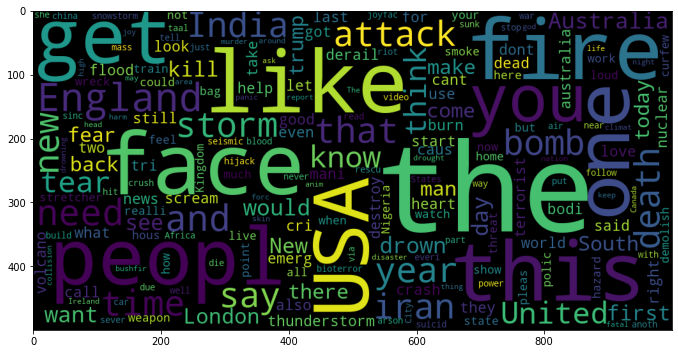

CPU times: user 1.72 s, sys: 149 ms, total: 1.87 s
Wall time: 1.77 s


In [ ]:
%%time
dict_of_words = {}
for row in  X_train.itertuples():
    for i in row[1].split():
        try:
            dict_of_words[i] += 1
        except:
            dict_of_words[i] = 1

#Initializing  WordCloud
wordcloud = WordCloud(background_color = 'black', width=1000, height=500).generate_from_frequencies(dict_of_words)
fig = plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.tight_layout(pad=1)
plt.show()

## Final Pre-Processing Data

In [ ]:
# Step 1. Remove Url
X_test['text'] = X_test['text'].apply(Remove_Url)
# Step 2. Handle Tags
X_test['text'] = X_test['text'].apply(Handle_Tags)
# Step 3. Handle emoji's
X_test['text'] = X_test['text'].apply(Handle_emoji)
# Step 4. Remove HTML Tags
X_test['text'] = X_test['text'].apply(Remove_html)
# Step 5. Remove Stopwords and Stemming
X_test['text'] = X_test['text'].apply(Remove_StopAndStem)
# Step 6. Removing Useless Characters
X_test['text'] = X_test['text'].apply(Remove_UC)
# Step7. Merging Other Details
X_test = merging_details(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [ ]:
X_test

,Cleaned_data
0,demolished Observation drone how mani illeg bu...
1,fatality who fatal tho
2,sunk London chines state media confirm iranian...
3,windstorm London with luck miss windstorm eith...
4,buildingsonfire inferno black friday deaths bu...
...,...
2269,eyewitness United States plp leader call hypoc...
2270,thunderstorm Pluto cant sleep open window take...
2271,attacked Lagos Nigeria son teenag girl arrest ...
2272,loudbang Michigan USA brother got bathroom hea...


In [ ]:
y_train = y_train['target']
y_test = y_test['target']

In [ ]:
%%time
#smooth_idf=True by default so smoothing is done by defult.
#norm is l2 by default.
#subliner is used False by default.
vectorizer = TfidfVectorizer(min_df = 0.0005,
                             max_features = 100000,
                             tokenizer = lambda x: x.split(),
                             ngram_range = (1,4))


X_train = vectorizer.fit_transform(X_train['Cleaned_data'])
X_test = vectorizer.transform(X_test['Cleaned_data'])

CPU times: user 1.44 s, sys: 48.4 ms, total: 1.49 s
Wall time: 1.51 s


In [ ]:
#https://stackoverflow.com/questions/16505670/generating-a-dense-matrix-from-a-sparse-matrix-in-numpy-python
print("Training Points: ", len(X_train.toarray()),"| Training Features:" , len(X_train.toarray()[0]))
print("Testing Points: ", len(X_test.toarray()),"| Testing Features:" , len(X_test.toarray()[0]))
print()
print("Training Points: ", len(y_train))
print("Testing Points: ", len(y_test))

Training Points:  9096 | Training Features: 4678
Testing Points:  2274 | Testing Features: 4678

Training Points:  9096
Testing Points:  2274


## Machine Learning

### Logistic Regression

In [ ]:
%%time

Model = LogisticRegression(C=1,penalty='l2')

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)
print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

Acuracy 0.882145998240985
Macro precision_recall_fscore_support
(0.8699936326010824, 0.6875221867234647, 0.7336249580396106, None)
Micro precision_recall_fscore_support
(0.882145998240985, 0.882145998240985, 0.8821459982409852, None)
Weighted precision_recall_fscore_support
(0.8794031445542358, 0.882145998240985, 0.8632528623849799, None)
CPU times: user 169 ms, sys: 3.73 ms, total: 172 ms
Wall time: 183 ms


### Naive Bayes

#### Gaussian Naive Bayes

In [ ]:
%%time
Model = GaussianNB()
Model.fit(X_train.toarray(), y_train)
y_pred = Model.predict(X_test.toarray())

print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

Acuracy 0.6543535620052771
Macro precision_recall_fscore_support
(0.6183811954769804, 0.7030528931487399, 0.5947656286133786, None)
Micro precision_recall_fscore_support
(0.6543535620052771, 0.6543535620052771, 0.6543535620052771, None)
Weighted precision_recall_fscore_support
(0.8218584748469638, 0.6543535620052771, 0.696037781465206, None)
CPU times: user 731 ms, sys: 174 ms, total: 904 ms
Wall time: 909 ms


#### Bernoulli Naive Bayes

In [ ]:
%%time
Model = BernoulliNB()
Model.fit(X_train.toarray(), y_train)
y_pred = Model.predict(X_test.toarray())

print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

Acuracy 0.8948988566402815
Macro precision_recall_fscore_support
(0.8415110917021487, 0.7649901571626812, 0.7951047820043453, None)
Micro precision_recall_fscore_support
(0.8948988566402815, 0.8948988566402815, 0.8948988566402815, None)
Weighted precision_recall_fscore_support
(0.8882727156018607, 0.8948988566402815, 0.8882962241029322, None)
CPU times: user 731 ms, sys: 121 ms, total: 852 ms
Wall time: 639 ms


#### Complement Naive Bayes

In [ ]:
%%time
Model = ComplementNB()
Model.fit(X_train.toarray(), y_train)
y_pred = Model.predict(X_test.toarray())

print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

Acuracy 0.8570800351802991
Macro precision_recall_fscore_support
(0.7536186200895507, 0.795898279923839, 0.7712363575244062, None)
Micro precision_recall_fscore_support
(0.8570800351802991, 0.8570800351802991, 0.8570800351802991, None)
Weighted precision_recall_fscore_support
(0.8712028357064902, 0.8570800351802991, 0.8625646635445304, None)
CPU times: user 427 ms, sys: 113 ms, total: 540 ms
Wall time: 369 ms


####  Multinomial Naive Bayes

In [ ]:
%%time
Model = MultinomialNB()
Model.fit(X_train.toarray(), y_train)
y_pred = Model.predict(X_test.toarray())

print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

Acuracy 0.8812664907651715
Macro precision_recall_fscore_support
(0.878383190883191, 0.6800150062929615, 0.7267527557036657, None)
Micro precision_recall_fscore_support
(0.8812664907651715, 0.8812664907651715, 0.8812664907651715, None)
Weighted precision_recall_fscore_support
(0.880588067263529, 0.8812664907651715, 0.8606646594236373, None)
CPU times: user 433 ms, sys: 69.5 ms, total: 502 ms
Wall time: 352 ms


### Support Vector Machines (SVM)

#### RBF Kernel SVM

In [ ]:
%%time
Model = svm.SVC(kernel='rbf') #rbf by default svm.SVC()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

Acuracy 0.8913808267370272
Macro precision_recall_fscore_support
(0.8787831991418029, 0.7160301094007164, 0.763219564386187, None)
Micro precision_recall_fscore_support
(0.8913808267370272, 0.8913808267370272, 0.8913808267370272, None)
Weighted precision_recall_fscore_support
(0.8887991240860746, 0.8913808267370272, 0.8767491464566864, None)
CPU times: user 10.1 s, sys: 67.7 ms, total: 10.2 s
Wall time: 10.2 s


#### Linear Kernel SVM

In [ ]:
%%time
Model = svm.SVC(kernel='linear')
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

Acuracy 0.8927000879507476
Macro precision_recall_fscore_support
(0.8499157899593945, 0.7447276277148481, 0.78212540582312, None)
Micro precision_recall_fscore_support
(0.8927000879507476, 0.8927000879507476, 0.8927000879507476, None)
Weighted precision_recall_fscore_support
(0.8859830991876001, 0.8927000879507476, 0.8832807631769126, None)
CPU times: user 5.76 s, sys: 18.1 ms, total: 5.77 s
Wall time: 5.79 s


### Random Forest

In [ ]:
%%time
Model = RandomForestClassifier(random_state=0)
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

Acuracy 0.886103781882146
Macro precision_recall_fscore_support
(0.8497576053359361, 0.7168207635460031, 0.758488551327426, None)
Micro precision_recall_fscore_support
(0.886103781882146, 0.886103781882146, 0.8861037818821461, None)
Weighted precision_recall_fscore_support
(0.8792888737797316, 0.886103781882146, 0.8729022063075199, None)
CPU times: user 5.87 s, sys: 4.75 ms, total: 5.87 s
Wall time: 5.89 s


## Deep Learning

In [ ]:

output_dim = 1
input_dim = X_train.shape[1]

batch_size = 200
nb_epoch = 100

### Single Layer Perceptron

In [ ]:
%%time
model = Sequential()

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))
model.summary()
y_pred = model.predict(X_test)

print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 9096 samples, validate on 2274 samples
Epoch 1/100
9096/9096 [==============================] - 1s 89us/sample - loss: 12.4372 - acc: 0.1889 - val_loss: 12.5937 - val_acc: 0.1741
Epoch 2/100
9096/9096 [==============================] - 0s 53us/sample - loss: 12.4372 - acc: 0.1889 - val_loss: 12.5937 - val_acc: 0.1741
Epoch 3/100
9096/9096 [==============================] - 0s 52us/sample - loss: 12.4372 - acc: 0.1889 - val_loss: 12.5937 - val_acc: 0.1741
Epoch 4/100
9096/9096 [==============================] - 0s 49us/sample - loss: 12.4372 - acc: 0.1889 - val_loss: 12.5937 - val_acc: 0.1741
Epoch 5/100
9096/9096 [==============================] - 0s 48us/sample - loss: 12.4372 - acc: 0.1889 - val_loss: 12.5937 - val_acc: 0.1741
Epoch 6/100
9096/9096 [==============================] - 0s 49us/sample - los

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0870712401055409, 0.5, 0.14831460674157304, None)
Micro precision_recall_fscore_support
(0.1741424802110818, 0.1741424802110818, 0.1741424802110818, None)
Weighted precision_recall_fscore_support
(0.030325603414067013, 0.1741424802110818, 0.05165574693901752, None)
CPU times: user 45.3 s, sys: 2.22 s, total: 47.5 s
Wall time: 45.2 s


### Multilayer perceptron

#### Architecture

In [ ]:
input_dim = X_train.shape[1]
hidden_layer_1 = 1560
hidden_layer_2 = 519
hidden_layer_3 = 173
output_dim = 1

batch_size = 200
nb_epoch = 100

#### Model 1 : SIGMOID + ADAM

In [ ]:
%%time

model_sigmoid = Sequential()
model_sigmoid.add(Dense(hidden_layer_1, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.0179, seed=None)))
model_sigmoid.add(Dense(hidden_layer_2, activation='sigmoid',kernel_initializer=RandomNormal(mean=0.0, stddev=0.0310, seed=None)))
model_sigmoid.add(Dense(hidden_layer_3, activation='sigmoid',kernel_initializer=RandomNormal(mean=0.0, stddev=0.0537, seed=None)))
model_sigmoid.add(Dense(output_dim, activation='softmax', kernel_initializer=RandomNormal(mean=0.0, stddev=0.107, seed=None)))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_sigmoid.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

y_pred = model_sigmoid.predict(X_test)

print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1560)              7299240   
_________________________________________________________________
dense_2 (Dense)              (None, 519)               810159    
_________________________________________________________________
dense_3 (Dense)              (None, 173)               89960     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 174       
Total params: 8,199,533
Trainable params: 8,199,533
Non-trainable params: 0
_________________________________________________________________
Train on 9096 samples, validate on 2274 samples
Epoch 1/100
9096/9096 [==============================] - 8s 897us/sample - l

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0870712401055409, 0.5, 0.14831460674157304, None)
Micro precision_recall_fscore_support
(0.1741424802110818, 0.1741424802110818, 0.1741424802110818, None)
Weighted precision_recall_fscore_support
(0.030325603414067013, 0.1741424802110818, 0.05165574693901752, None)
CPU times: user 24min 7s, sys: 12.5 s, total: 24min 20s
Wall time: 13min 27s


## Conclusion<br>

1. Deep Learning Models are easy to overfit and underfit.<br>
2. Relu and Adam with Dropout proved to best as expected.<br>
3. SVM is still the best as far as accuracy and training time is concerned.

